In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random
import math

import torch
import torch.nn as nn
import time

## Load data

Load the data into tensors.

In [152]:
df = pd.read_csv('data/train.csv')
print(df.shape)
df.head()

(17892, 41)


,ConfirmedCases,Country/Region,Date,Fatalities,ForecastId,Id,Lat,Long,Province/State,Place,...,GDP based on PPP share of world total,Unemployment rate,Population,Life expectancy,Population density,Median age,Urban population %,Hospital beds,Sex ratio,Death rate from lung diseases
0,0.0,Afghanistan,2020-01-22,0.0,NaN,1.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62
1,0.0,Afghanistan,2020-01-23,0.0,NaN,2.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62
2,0.0,Afghanistan,2020-01-24,0.0,NaN,3.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62
3,0.0,Afghanistan,2020-01-25,0.0,NaN,4.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62
4,0.0,Afghanistan,2020-01-26,0.0,NaN,5.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62


In [34]:
for col in df.columns:
    print("'"+col+"',")

'ConfirmedCases',
'Country/Region',
'Date',
'Fatalities',
'ForecastId',
'Id',
'Lat',
'Long',
'Province/State',
'Place',
'Day',
'Cases/day',
'Fatals/day',
'Cases yesterday',
'Cases last week',
'Cases 2weeks ago',
'Cases 3weeks ago',
'Fatals yesterday',
'Fatals last week',
'Fatals 2weeks ago',
'Fatals 3weeks ago',
'Days since 1st case',
'Days since 10th case',
'Days since 100th case',
'Days since 1st fatal',
'Days since 10th fatal',
'Days since 100th fatal',
'Smoking rate',
'Nominal GDP',
'GDP based on PPP',
'GDP per capita',
'GDP based on PPP share of world total',
'Unemployment rate',
'Population',
'Life expectancy',
'Population density',
'Median age',
'Urban population %',
'Hospital beds',
'Sex ratio',
'Death rate from lung diseases',


Start from predicting confirmed cases.

In [151]:
# Select features
col_target = 'Cases/day'
col_features = [
    #'ConfirmedCases',
    #'Country/Region',
    #'Date',
    #'Fatalities',
    #'ForecastId',
    #'Id',
    'Lat',
    'Long',
    #'Province/State',
    #'Place',
    #'Day',
    #'Cases/day',
    #'Fatals/day',
    'Cases yesterday',
    'Cases last week',
    'Cases 2weeks ago',
    'Cases 3weeks ago',
    'Fatals yesterday',
    'Fatals last week',
    'Fatals 2weeks ago',
    'Fatals 3weeks ago',
    'Days since 1st case',
    'Days since 10th case',
    'Days since 100th case',
    'Days since 1st fatal',
    'Days since 10th fatal',
    'Days since 100th fatal',
    'Smoking rate',
    'Nominal GDP',
    'GDP based on PPP',
    'GDP per capita',
    'GDP based on PPP share of world total',
    'Unemployment rate',
    'Population',
    'Life expectancy',
    'Population density',
    'Median age',
    'Urban population %',
    'Hospital beds',
    'Sex ratio',
    'Death rate from lung diseases'
]

In [153]:
# Fill in missing values by column median
for col in col_features:
    df[col] = df[col].fillna(df[col].median())

In [154]:
pd.isna(df[col_features]).sum()

Lat                                      0
Long                                     0
Cases yesterday                          0
Cases last week                          0
Cases 2weeks ago                         0
Cases 3weeks ago                         0
Fatals yesterday                         0
Fatals last week                         0
Fatals 2weeks ago                        0
Fatals 3weeks ago                        0
Days since 1st case                      0
Days since 10th case                     0
Days since 100th case                    0
Days since 1st fatal                     0
Days since 10th fatal                    0
Days since 100th fatal                   0
Smoking rate                             0
Nominal GDP                              0
GDP based on PPP                         0
GDP per capita                           0
GDP based on PPP share of world total    0
Unemployment rate                        0
Population                               0
Life expect

In [155]:
len(col_features)

30

In [208]:
# Original
#Xdata = np.array(df[col_features])
#Ydata = np.array(df[col_target])

# Normalized
Xdata = MinMaxScaler().fit_transform(np.array(df[col_features]))
Ydata = MinMaxScaler().fit_transform(np.array(df[col_target]).reshape(-1, 1)).reshape(1, -1)[0]

In [157]:
# Original
print(max(Ydata))
print(min(Ydata))

14840
-19849


In [209]:
# Normalized
print(max(Ydata))
print(min(Ydata))

1.0
0.0


In [158]:
# Original
print(Xdata)
print(Ydata)

[[ 33.      65.       0.     ...   0.5      1.03    37.62  ]
 [ 33.      65.       0.     ...   0.5      1.03    37.62  ]
 [ 33.      65.       0.     ...   0.5      1.03    37.62  ]
 ...
 [-15.4167  28.2833   0.     ...   2.       1.      20.04  ]
 [-15.4167  28.2833   1.     ...   2.       1.      20.04  ]
 [-15.4167  28.2833   0.     ...   2.       1.      20.04  ]]
[0 0 0 ... 1 0 0]


In [210]:
# Normalized
print(Xdata)
print(Ydata)

[[0.65794962 0.66940075 0.00416052 ... 0.01423143 0.07392996 0.29011946]
 [0.65794962 0.66940075 0.00416052 ... 0.01423143 0.07392996 0.29011946]
 [0.65794962 0.66940075 0.00416052 ... 0.01423143 0.07392996 0.29011946]
 ...
 [0.23009436 0.55893615 0.00416052 ... 0.12096717 0.06225681 0.1273266 ]
 [0.23009436 0.55893615 0.00422762 ... 0.12096717 0.06225681 0.1273266 ]
 [0.23009436 0.55893615 0.00416052 ... 0.12096717 0.06225681 0.1273266 ]]
[0.57219868 0.57219868 0.57219868 ... 0.57222751 0.57219868 0.57219868]


In [211]:
random.seed(420)
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.2)

In [212]:
np.shape(X_train)

(14313, 30)

In [213]:
Xtrain = torch.Tensor(X_train)
Xtest = torch.Tensor(X_test)
ytrain = torch.Tensor(y_train)
ytest = torch.Tensor(y_test)

Load the data into dataloaders(batches) for stochastic gradient descent.

In [214]:
train = torch.utils.data.TensorDataset(Xtrain, ytrain)
test = torch.utils.data.TensorDataset(Xtest, ytest)

# Set batch size to be the square root of the data points
train_loader = torch.utils.data.DataLoader(train, batch_size=math.ceil(len(Xtrain)**(1/2)),num_workers=2)
test_loader = torch.utils.data.DataLoader(test, batch_size=math.ceil(len(Xtest)**(1/2)), shuffle=False,num_workers=2)

## Build MLP model

Build a three layer neural network for our task. With PyTorch, we only need to specify the forward layers and we get the backpropgation for free.

In [127]:
class My_Net(nn.Module): 
    def __init__(self, input_size, num_neurons):
        super(My_Net, self).__init__()
        # 3 hidden layers
        self.layer_1 = nn.Linear(input_size, num_neurons)
        self.layer_2 = nn.Linear(num_neurons, num_neurons)
        self.layer_3 = nn.Linear(num_neurons, 1)

        # Activation function
        self.relu = nn.ReLU()
        
    def forward(self, input_data):
        out = self.layer_1(input_data)
        out = self.relu(out)
        out = self.layer_2(out)
        out = self.relu(out)
        out = self.layer_3(out).view(-1)
        
        return out

In [163]:
len(col_features)

30

In [220]:
# Set one input node for each feature, and make number of hidden nodes equals 2/3 of input nodes
net=My_Net(input_size=len(col_features), num_neurons=int(len(col_features)*2/3))

# MSE loss for regression tasks
loss=nn.MSELoss()

# Use Adam optimizer
opt=torch.optim.Adam(net.parameters(),lr=0.001)

Adam: Denote all parameters as W, W^(t+1) - W^t - alpha x delta(W) x Loss

Define the training and the testing function.

In [108]:
def train_eval():
    loss_sum = 0 # MSE
    num_batches = 0
    for inputs, target in train_loader:
        output = net(inputs)
        loss_sum  += loss(output,target).item()
        num_batches += 1
    
    return loss_sum/num_batches # Return average loss

def test_eval():
    loss_sum = 0 # MSE
    num_batches = 0
    for inputs, target in test_loader:
        output = net(inputs)
        loss_sum  += loss(output,target).item()
        num_batches += 1

    return loss_sum/num_batches # Return average loss

Train the network and report  the training loss/accuracy.

In [61]:
# Initialize the network using Xavier initialization
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)

In [221]:
net.apply(weights_init)

My_Net(
  (layer_1): Linear(in_features=30, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

Start training.

In [222]:
epochs = 100
train_loss_store = []
test_loss_store = []

for epoch in range(epochs):
    time1 = time.time()
    for i, (x,y) in enumerate(train_loader,0):
        opt.zero_grad() # Start each batch with all gradients zero, don't accumulate from past batch
        output = net(x)
        l = loss(output, y)
        l.backward()
        opt.step()
    
    train_loss_store.append(train_eval())
    test_loss_store.append(test_eval())

    time2 = time.time()
    if (epoch+1) % 10 == 0:
        print('In epoch %i : '%(epoch+1))
        print("Time lapse: %f secs" %round((time2-time1),2))

In epoch 10 : 
Time lapse: 0.990000 secs
In epoch 20 : 
Time lapse: 0.820000 secs
In epoch 30 : 
Time lapse: 0.800000 secs
In epoch 40 : 
Time lapse: 0.790000 secs
In epoch 50 : 
Time lapse: 0.830000 secs
In epoch 60 : 
Time lapse: 0.730000 secs
In epoch 70 : 
Time lapse: 0.810000 secs
In epoch 80 : 
Time lapse: 0.870000 secs
In epoch 90 : 
Time lapse: 0.970000 secs
In epoch 100 : 
Time lapse: 0.780000 secs


Visualize the training and testing loss/accuracy.

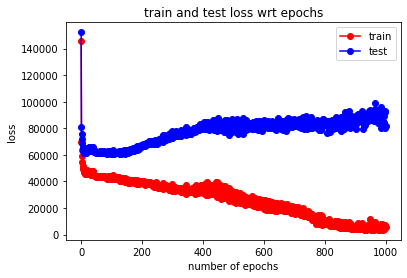

In [167]:
# 1000 epochs, not normalized
plt.plot(train_loss_store,'r-o')
plt.plot(test_loss_store,'b-o')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(('train','test'),loc='upper right')
plt.title('train and test loss wrt epochs')
plt.show()

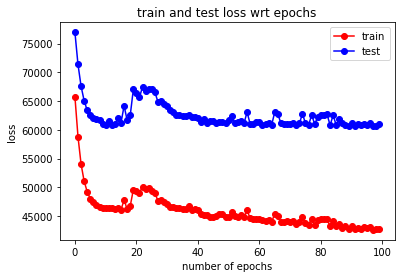

In [188]:
# 100 epochs, not normalized
plt.plot(train_loss_store,'r-o')
plt.plot(test_loss_store,'b-o')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(('train','test'),loc='upper right')
plt.title('train and test loss wrt epochs')
plt.show()

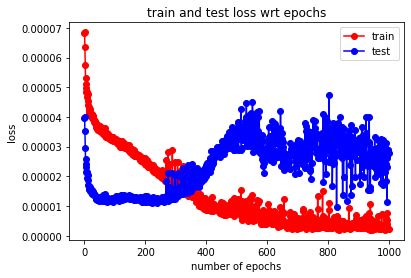

In [219]:
# 1000 epochs, normalized
plt.plot(train_loss_store,'r-o')
plt.plot(test_loss_store,'b-o')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(('train','test'),loc='upper right')
plt.title('train and test loss wrt epochs')
plt.show()

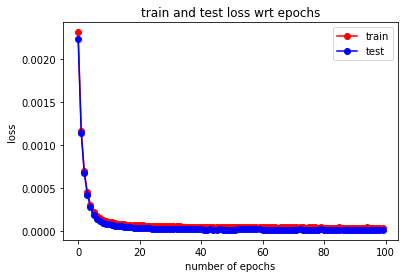

In [223]:
# 100 epochs, normalized
plt.plot(train_loss_store,'r-o')
plt.plot(test_loss_store,'b-o')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(('train','test'),loc='upper right')
plt.title('train and test loss wrt epochs')
plt.show()

If loss is increasing, we might want to use a smaller learning rate.